In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("./files/trainingSet.csv")

In [2]:
data.change.value_counts()

change
0    33
1    10
Name: count, dtype: int64

### Let's try to undersample so the model predicts equally

In [192]:
data0 = data[data.change == 0].sample(25)
data1 = data[data.change == 1]
data = pd.concat([data0, data1], ignore_index=True)

In [193]:
y = data['change']  # Labels
X = data[['building_percent', 'overlap_percent']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80% training

In [194]:
steps = [('scaler', StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=3))]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)
joblib.dump(pipeline, './files/some_model.pkl')  # Save model as pkl file
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

['./files/some_model.pkl']

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.83      0.56      0.67         9

    accuracy                           0.82        28
   macro avg       0.83      0.75      0.77        28
weighted avg       0.82      0.82      0.81        28

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.00      0.00      0.00         1

    accuracy                           0.71         7
   macro avg       0.42      0.42      0.42         7
weighted avg       0.71      0.71      0.71         7


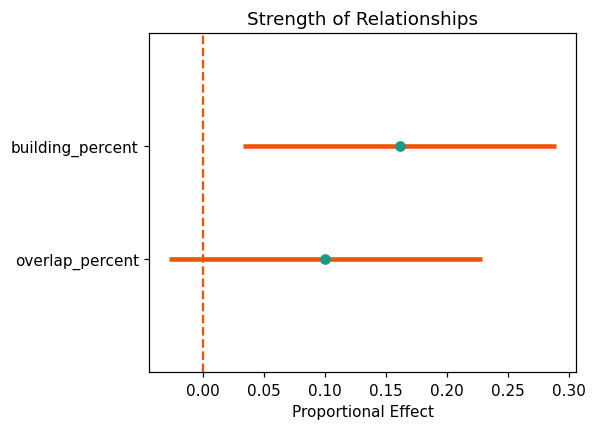

In [197]:
y_log = data['change']
X_norm = data[['building_percent', 'overlap_percent']]
X_norm = (X_norm - X_norm.mean()) / X_norm.std()
res_norm = sm.OLS(y_log, sm.add_constant(X_norm)).fit()

to_include = res_norm.params[1:].sort_values()
#to_include = res_norm.params[res_norm.pvalues < 0.05][1:].sort_values() # get only those with significant pvalues
fig, ax = plt.subplots(figsize=(5,4), dpi=110)
ax.scatter(to_include, range(len(to_include)), color="#1a9988", zorder=2)
ax.set_yticks(range(len(to_include)), to_include.index) # label the y axis with the ind. variable names
ax.set_xlabel("Proportional Effect")
ax.set_title("Strength of Relationships")
ax.set_ylim([-1, 2])

# add the confidence interval error bars
for idx, ci in enumerate(res_norm.conf_int().loc[to_include.index].iterrows()):
    ax.hlines(idx, ci[1][0], ci[1][1], color="#eb5600", zorder=1, linewidth=3)

plt.axline((0,0), (0,1), color="#eb5600", linestyle="--"); # add a dashed line at 0.0